In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Read cleaned data
state_df = pd.read_csv('inc_cleaned_data.csv', sep='|')

In [3]:
state_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA


In [4]:
# Calculate previous revenue for companies based on on current revenue and growth values. Create separate column
# in dataframe.
state_df.loc[:,('prev_revenue')] = state_df.apply(lambda x: (100/(x['growth']+100)) * x['revenue'], axis=1).values

In [5]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 10 columns):
rank            4997 non-null int64
name            4997 non-null object
revenue         4997 non-null float64
industry        4993 non-null object
employees       4861 non-null float64
founded         4994 non-null float64
growth          4997 non-null int64
city            4996 non-null object
state           4997 non-null object
prev_revenue    4997 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 390.5+ KB


In [6]:
state_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state,prev_revenue
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA,0.108056
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX,0.103415
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA,0.143020
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA,0.125123
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA,0.233321


In [7]:
# calculate growth % state wise
state_group_df = state_df.groupby('state').sum().sort_values(by='revenue', ascending=False)[['revenue','prev_revenue']]
state_group_df

,revenue,prev_revenue
state,,
CA,27032.8,10475.686546
CT,26770.6,15706.624367
TX,20308.9,8335.269555
NY,15536.3,7734.372436
FL,12557.1,5085.871478
VA,10166.9,4411.613214
OH,10159.1,5185.844466
GA,9029.9,4074.054640
IL,8885.0,4225.483529


In [8]:
state_growth = state_group_df.apply(lambda x: ((x['revenue']-x['prev_revenue'])/x['prev_revenue'])*100, axis=1).sort_values(ascending=False)
state_growth

state
MT    309.454893
ME    299.326029
WV    287.365842
PR    217.374408
HI    214.651387
AR    198.596460
NE    198.079810
NM    191.444143
VT    179.192129
DC    176.083047
NC    171.968213
AL    160.239708
OK    160.198090
UT    160.146700
CA    158.052777
NJ    153.356201
OR    152.368959
SC    150.244223
FL    146.901638
NV    146.315600
MO    144.519388
TX    143.650189
IA    134.266965
AZ    132.991825
MI    131.140280
WA    131.097694
VA    130.457647
ND    130.081927
LA    128.303818
SD    127.054504
GA    121.644057
WY    120.705523
KS    119.955574
NH    118.860813
MD    117.411284
ID    111.131426
IL    110.271794
DE    106.972120
TN    101.718961
NY    100.873440
PA     99.533475
CO     99.493786
IN     98.695140
MN     97.786652
OH     95.900592
WI     91.516586
AK     91.000000
MA     81.480051
MS     72.928322
KY     71.956600
CT     70.441461
RI     51.817758
dtype: float64

In [9]:
state_df.groupby('state')['industry'].count().sort_values(ascending=False)

state
CA    670
TX    425
FL    368
NY    307
VA    289
IL    238
GA    233
PA    185
OH    172
MA    146
NJ    140
NC    124
MD    121
AZ    120
WA    116
CO    114
UT    110
MI    101
MN     86
TN     86
MO     81
IN     67
OR     66
AL     59
SC     58
WI     53
LA     46
DC     44
KY     36
KS     35
CT     34
OK     28
IA     28
NV     28
NE     25
NH     22
DE     16
AR     14
ID     14
MS     13
ME     12
SD     11
ND      9
MT      8
RI      8
HI      7
WV      6
WY      4
NM      4
PR      3
VT      2
AK      1
Name: industry, dtype: int64

In [10]:
d = state_df.groupby('state')['industry'].value_counts()

In [11]:
for x in state_df.groupby('state'):
    #print(x[0] + "\t" + str(x[1].sum()['revenue']))
    temp = x[1].groupby('industry').apply(lambda y: ((y['revenue'].sum()-y['prev_revenue'].sum())/y['prev_revenue'].sum())*100).sort_values(ascending=False)
    print(x[0] + "\t" + str(temp.index[0]) + "\t\t\t\t" + str(temp.values[0]))

AK	Health				91.0
AL	Energy				2732.0
AR	Retail				3983.11500208
AZ	Education				874.0
CA	Security				292.501102823
CO	Logistics & Transportation				2074.16618911
CT	Food & Beverage				665.0
DC	Energy				742.935803662
DE	Business Products & Services				2441.0
FL	Media				415.728956256
GA	Travel & Hospitality				542.662285792
HI	Construction				551.766172186
IA	Energy				550.0
ID	Retail				606.920753279
IL	Energy				1316.96848989
IN	Advertising & Marketing				257.503804464
KS	Human Resources				296.012016285
KY	Insurance				2231.0
LA	Energy				2079.0
MA	Consumer Products & Services				646.197265625
MD	Food & Beverage				438.538171536
ME	Business Products & Services				9204.0
MI	Engineering				1016.0
MN	Consumer Products & Services				989.0
MO	Energy				1100.0
MS	Computer Hardware				1122.0
MT	Manufacturing				2114.0
NC	Real Estate				697.998935383
ND	Real Estate				289.0
NE	Advertising & Marketing				737.0
NH	Financial Services				1361.0
NJ	Media				1161.0
NM	IT Services				394.0
NV	Gov

In [12]:
#MAPS

In [43]:
'''
state_codes = {
        'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois',
        'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',
        'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota',
        'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
        'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico',
        'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
        'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington',
        'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
}
len(state_codes)
'''

"\nstate_codes = {\n        'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',\n        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',\n        'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois',\n        'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',\n        'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands',\n        'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota',\n        'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',\n        'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico',\n        'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',

In [44]:
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'American Samoa': 'AS',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'National': 'NA',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Virgin Islands': 'VI',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [45]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

In [46]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

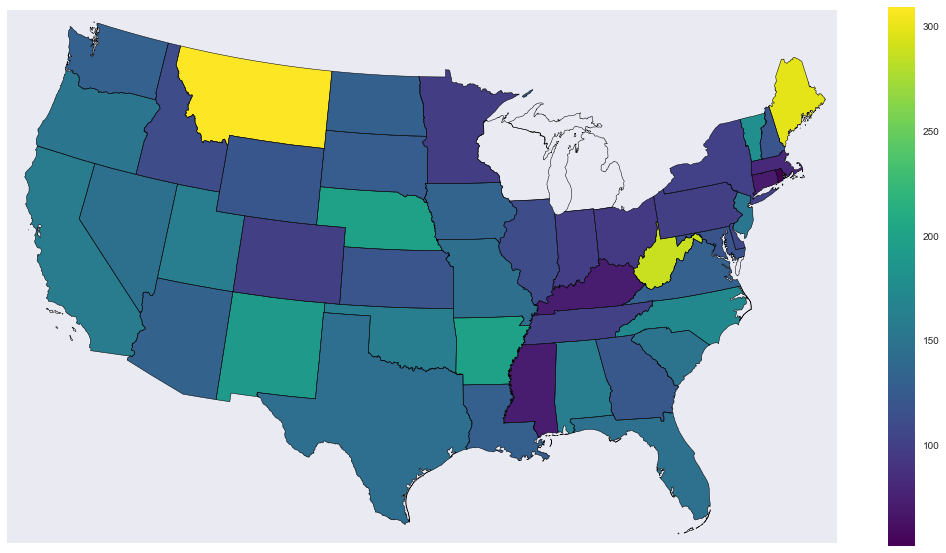

In [28]:
'''
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
m.readshapefile('shape_files/st99_d00', name='states', drawbounds=True)
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['NAME'])

#ax = plt.gca() # get current axes instance

state_index = []
for s in list(state_growth.index):
    state_index.append(m.states[state_names.index(state_codes[s])])

values_array = state_growth.values

coll = PolyCollection(state_index, array=values_array, cmap='viridis', edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax, shrink=0.52)
'''

In [38]:
state_growth.values

array([ 309.45489306,  299.32602876,  287.36584195,  217.37440762,
        214.65138704,  198.59646001,  198.07980996,  191.44414258,
        179.19212889,  176.08304659,  171.96821261,  160.23970758,
        160.19809   ,  160.14669973,  158.0527766 ,  153.3562008 ,
        152.3689586 ,  150.24422327,  146.90163829,  146.31560002,
        144.51938817,  143.6501887 ,  134.2669649 ,  132.99182489,
        131.14028033,  131.09769406,  130.45764684,  130.08192735,
        128.30381798,  127.05450435,  121.64405729,  120.70552261,
        119.95557426,  118.86081317,  117.411284  ,  111.13142576,
        110.27179351,  106.97212037,  101.71896126,  100.87344032,
         99.53347451,   99.49378619,   98.69513972,   97.78665151,
         95.90059181,   91.51658565,   91.        ,   81.48005081,
         72.92832206,   71.95659962,   70.44146071,   51.81775817])

In [70]:
sns.set_style(style='white')

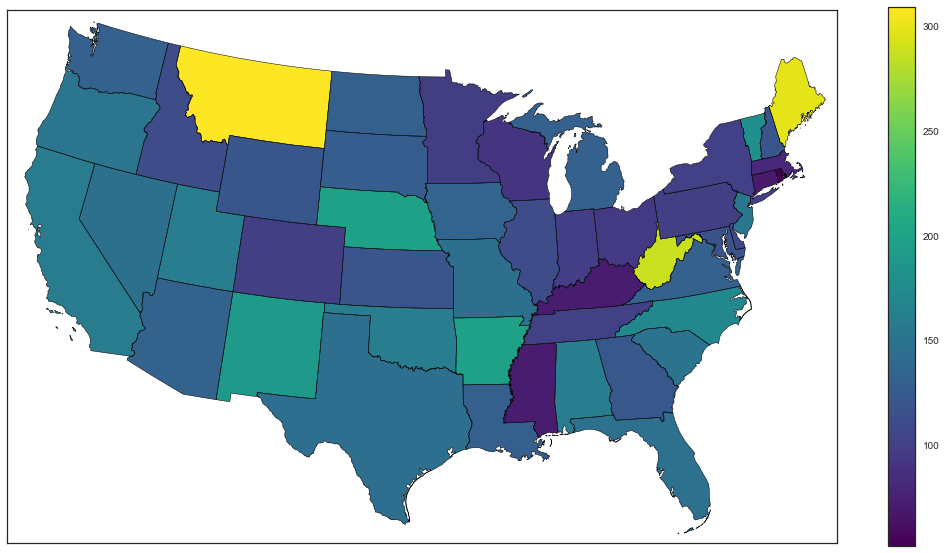

In [71]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
m.readshapefile('shape_files/st99_d00', name='states', drawbounds=True)
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['NAME'])

values_list = []
for state in state_names:
    values_list.append(state_growth[state_codes[state]])
values_array = np.array(values_list)    

coll = PolyCollection(m.states, array=values_array, cmap='viridis', edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax, shrink=0.52)

In [31]:
state_names

['Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Minnesota',
 'Washington',
 'Washington',
 'Montana',
 'Idaho',
 'North Dakota',
 'Washington',
 'Washingto

In [33]:
state_growth['CO']

99.493786193450987

In [41]:
len(state_codes)

55

In [53]:
len(state_growth.index)

52

In [55]:
len(set(state_names))

52

In [68]:
len(values_array)

273

In [67]:
len(state_names)

273